In [1]:
import os
print(os.getcwd())
os.chdir("/Users/heinerleivagmail.com/Desktop/Master_final")

/Users/heinerleivagmail.com/Desktop/Master_final


In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Leyendo datasets
df1= pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv", low_memory=False)
df2 = pd.read_csv("Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv", low_memory = False)
df3 = pd.read_csv("Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv", low_memory = False)

In [4]:
# Creando joins
left_merged = pd.merge(df2, df3, how="left", on=["REPORT_NO", "VEHICLE_ID"])
data = pd.merge(left_merged, df1, how="left", on=["REPORT_NO", "REPORT_NO"])

In [5]:
# Comprobando el tamaño del dataset
data.shape

(1728805, 150)

In [6]:
# Validando columnas con registros nulos o en NaN
np.sum(data.isnull())

SEX_DESC                        131536
SEX_CODE                        131536
CONDITION_DESC                  409791
CONDITION_CODE                  406613
INJ_SEVER_DESC                       0
INJ_SEVER_CODE                       0
REPORT_NO                            0
OCC_SEAT_POS_DESC              1326595
OCC_SEAT_POS_CODE              1326595
PED_VISIBLE_DESC               1697507
PED_VISIBLE_CODE               1697507
PED_OBEY_DESC                  1697507
PED_OBEY_CODE                  1697507
PED_TYPE_DESC                  1697507
PED_TYPE_CODE                  1697507
PED_LOCATION_CODE              1697507
MOVEMENT_DESC_x                1697507
MOVEMENT_CODE_x                1697507
PERSON_TYPE_DESC                     0
PERSON_TYPE                          0
ALCOHOL_TEST_DESC               402210
ALCOHOL_TEST_CODE               402210
ALCOHOL_TESTTYPE_DESC          1695550
ALCOHOL_TESTTYPE_CODE          1695550
DRUG_TEST_DESC                  402210
DRUG_TEST_CODE           

In [7]:
# Validando columnas con mas nulos
data.isnull().sum().sort_values(ascending=False).pipe(lambda s: s[s > 0])

MUNI_DESC                      1728805
HZM_NUM                        1723872
DRUG_TESTRESULT_DESC           1719850
DRUG_TESTRESULT_CODE           1719850
BAC_CODE                       1707666
PED_VISIBLE_CODE               1697507
PED_OBEY_DESC                  1697507
PED_OBEY_CODE                  1697507
PED_TYPE_DESC                  1697507
PED_TYPE_CODE                  1697507
PED_LOCATION_CODE              1697507
MOVEMENT_DESC_x                1697507
MOVEMENT_CODE_x                1697507
PED_VISIBLE_DESC               1697507
ALCOHOL_TESTTYPE_CODE          1695550
ALCOHOL_TESTTYPE_DESC          1695550
HAZMAT_SPILL_FLAG              1693242
HAZMAT_SPILL_FLAG_DESC         1693242
RTE_SUFFIX                     1689964
REFERENCE_SUFFIX               1689208
NUM_AXLES                      1612055
GVW_CODE                       1611879
GVW_DESC                       1611879
CV_BODY_TYPE_DESC              1611879
CV_BODY_TYPE_CODE              1611879
EMS_UNIT_LABEL           

Analisis de nulos:

1. Se van a proceder a eliminar todas aquellas columnas que tienen mas de 172000 registros nulos ya que el dataset tiene una dimension de 1728805 y 172000 registros nulos representa mas de un 10%, por ende no se van a tomar en cuenta ya que solo anadirian ruedo al modelo y si se imputan se crearia un sesgo al redimensionar variables con registros especificos. 

2. Con las restantes columnas se va a proceder a utilizar un metodo de imputacion dirigido en Python como imputar utilizando la moda, ya que la mayoria de las variables son categoricas.

In [8]:
data = data.drop(['MUNI_DESC', 'HZM_NUM', 'DRUG_TESTRESULT_CODE', 'DRUG_TESTRESULT_DESC', 'MOVEMENT_CODE_x', 'MOVEMENT_DESC_x', 
                  'PED_LOCATION_CODE', 'FEET_MILES_FLAG_DESC', 'PED_TYPE_CODE', 'PED_TYPE_DESC', 'PED_OBEY_CODE', 'PED_OBEY_DESC', 'PED_VISIBLE_CODE', 
                  'PED_VISIBLE_DESC', 'BAC_CODE', 'ALCOHOL_TESTTYPE_DESC', 'ALCOHOL_TESTTYPE_CODE', 'HAZMAT_SPILL_FLAG_DESC', 
                  'HAZMAT_SPILL_FLAG', 'RTE_SUFFIX', 'REFERENCE_SUFFIX', 'NUM_AXLES', 'CV_BODY_TYPE_DESC', 'GVW_DESC', 'GVW_CODE', 
                  'CV_BODY_TYPE_CODE', 'EMS_UNIT_LABEL', 'HARM_EVENT_DESC1', 'OCC_SEAT_POS_CODE', 'OCC_SEAT_POS_DESC', 'AREA_DAMAGED_CODE3', 
                  'LOC_CODE', 'CLASS', 'WEATHER_DESC', 'AREA_DAMAGED_CODE2', 'LICENSE_STATE_CODE', 'FAULT_FLAG_DESC', 'CDL_FLAG', 'CDL_FLAG_DESC',
                  'CONDITION_DESC', 'CONDITION_CODE', 'FAULT_FLAG', 'DRUG_TEST_DESC', 'ALCOHOL_TEST_DESC', 'ALCOHOL_TEST_CODE', 'DRUG_TEST_CODE', 
                  'ALCOHOL_TEST_CODE', 'DRUG_TEST_CODE', 'ALCOHOL_TEST_DESC', 'MUNI_CODE', 'REFERENCE_NO', 'LANE_DESC', 'LANE_CODE', 'RTE_NO', 
                  'ROUTE_TYPE_CODE', 'REFERENCE_TYPE_CODE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG','FIRE_FLAG_DESC', 'AIRBAG_DEPLOYED', 
                 'FIRE_FLAG', 'REPORT_TYPE'], axis=1)

In [9]:
# Comprobando nuevo tamaño de dataset
data.shape

(1728805, 91)

In [10]:
# Validando columnas nuevamente
data.isnull().sum().sort_values(ascending=False).pipe(lambda s: s[s > 0])

JUNCTION_DESC                  180077
DISTANCE                       162779
DATE_OF_BIRTH                  134541
RD_DIV_DESC                    133538
SEX_DESC                       131536
SEX_CODE                       131536
LOG_MILE                       128965
DISTANCE_DIR_FLAG              128757
SURF_COND_DESC                 126755
REFERENCE_ROAD_NAME            124283
MAINROAD_NAME                  122829
FEET_MILES_FLAG                122814
RD_DIV_CODE                    122812
JUNCTION_CODE                  122812
SURF_COND_CODE                 122812
RD_COND_DESC                   122812
RD_COND_CODE                   122812
VIN_NO                         102438
VEH_YEAR                       101787
AREA_DAMAGED_CODE1              92799
BODY_TYPE_DESC                  86164
BODY_TYPE_CODE                  85659
CONTI_DIRECTION_DESC            68432
CONTI_DIRECTION_CODE            68432
GOING_DIRECTION_DESC            68432
GOING_DIRECTION_CODE            68432
FIX_OBJ_DESC

No se eliminó la variable: "JUNCTION_DESC" porque tienen información importante sobre el tipo de intersección vehicular en que sucedió al accidente. 

In [11]:
# Variables para eliminar porque son descripciones o porque no anaden informacion relevante al analisis o han sido duplicaciones que se generan cuando los joins
# se ejecutaron y crearon copias de la variable pero con sufijos

data = data.drop(['LOCATION', 'REPORT_NO', 'COLLISION_TYPE_DESC', 'SURF_COND_DESC', 'LIGHT_DESC', 'COUNTY_DESC', 'JUNCTION_DESC', 'RD_COND_DESC', 
                  'RD_DIV_DESC', 'RD_DIV_CODE','FIX_OBJ_DESC', 'FIX_OBJ_CODE', 'SIGNAL_FLAG_DESC', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_CODE1', 
                  'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'LOG_MILE','MAINROAD_NAME', 'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_ROAD_NAME', 
                  'SEX_DESC', 'INJ_SEVER_DESC', 'PERSON_TYPE_DESC','EQUIP_PROB_DESC', 'SAF_EQUIP_DESC', 'EJECT_DESC', 'PERSON_ID', 'HARM_EVENT_DESC', 
                  'CONTI_DIRECTION_DESC', 'DAMAGE_DESC', 'MOVEMENT_DESC_y', 'COMMERCIAL_FLAG_DESC', 'TOWED_AWAY_FLAG_DESC', 'GOING_DIRECTION_DESC', 
                  'BODY_TYPE_DESC', 'DRIVERLESS_FLAG_DESC', 'PARKED_FLAG_DESC', 'HIT_AND_RUN_FLAG_DESC', 'TOWED_VEHICLE_CONFIG_DESC','AREA_DAMAGED_CODE_MAIN_DESC', 
                  'VIN_NO', 'VEH_MODEL', 'TOWED_AWAY_FLAG', 'AREA_DAMAGED_CODE_IMP1', 'AREA_DAMAGED_CODE1', 'AREA_DAMAGED_CODE_MAIN', 'YEAR_x', 'Quarter_x',
                  'YEAR_y', 'Quarter_y','DISTANCE', 'DATE_OF_BIRTH', 'EJECT_CODE', 'HARM_EVENT_CODE', 'VEH_YEAR', 'VEH_MAKE',
                  'HIT_AND_RUN_FLAG', 'TOWED_VEHICLE_CONFIG_CODE', 'YEAR', 'PERSON_TYPE', 'C_M_ZONE_FLAG', 'QUARTER', 'VEHICLE_ID'], axis = 1)

In [12]:
data.columns

Index(['SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE',
       'CONTI_DIRECTION_CODE', 'DAMAGE_CODE', 'MOVEMENT_CODE_y',
       'COMMERCIAL_FLAG', 'GOING_DIRECTION_CODE', 'BODY_TYPE_CODE',
       'DRIVERLESS_FLAG', 'PARKED_FLAG', 'SPEED_LIMIT', 'LIGHT_CODE',
       'COUNTY_NO', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'SIGNAL_FLAG',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [13]:
data.head()

,SEX_CODE,INJ_SEVER_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,CONTI_DIRECTION_CODE,DAMAGE_CODE,MOVEMENT_CODE_y,COMMERCIAL_FLAG,GOING_DIRECTION_CODE,BODY_TYPE_CODE,DRIVERLESS_FLAG,PARKED_FLAG,SPEED_LIMIT,LIGHT_CODE,COUNTY_NO,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,RD_COND_CODE,WEATHER_CODE,ACC_DATE,ACC_TIME,SIGNAL_FLAG,LATITUDE,LONGITUDE
0,F,1,0.0,0.0,NaN,2.0,10.0,N,NaN,21.00,N,Y,0.0,1.0,3.0,2.0,88.0,2.0,1.0,6.01,20170620.0,09:27:00,N,39.316645,-76.728809
1,M,2,0.0,13.0,E,4.0,12.0,N,S,2.00,N,N,35.0,1.0,16.0,2.0,11.0,2.0,1.0,6.01,20170402.0,13:26:00,Y,38.848088,-76.878811
2,F,3,1.0,13.0,N,4.0,2.0,N,N,23.08,N,N,35.0,3.0,21.0,1.0,17.0,1.0,1.0,6.01,20160603.0,01:17:00,N,39.619699,-77.769977
3,M,1,1.0,13.0,S,4.0,7.0,N,S,2.00,N,N,40.0,1.0,23.0,3.0,8.0,2.0,1.0,6.01,20180903.0,06:51:00,Y,38.387455,-75.065723
4,F,1,1.0,13.0,E,2.0,15.0,N,E,2.00,N,N,35.0,1.0,16.0,2.0,11.0,2.0,1.0,6.01,20150503.0,12:45:00,Y,38.939275,-76.915326


In [14]:
# Hay que transformar las variables categorias a numericas
obj_df = data.select_dtypes(include=['object']).copy()
print(obj_df.columns)

Index(['SEX_CODE', 'CONTI_DIRECTION_CODE', 'COMMERCIAL_FLAG',
       'GOING_DIRECTION_CODE', 'DRIVERLESS_FLAG', 'PARKED_FLAG', 'ACC_TIME',
       'SIGNAL_FLAG'],
      dtype='object')


In [15]:
# Importando Label Encoder
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

In [16]:
# Quitando la variable ACC_TIME
obj_df = obj_df[['SEX_CODE', 'CONTI_DIRECTION_CODE', 
                 'COMMERCIAL_FLAG','GOING_DIRECTION_CODE', 
                 'DRIVERLESS_FLAG', 'PARKED_FLAG','SIGNAL_FLAG']]

In [17]:
# Creando un for para iterar por todo el subset
for col in obj_df.columns:
    data[col] = lb_encoder.fit_transform(data[col].astype(str))

In [18]:
data.shape

(1728805, 25)

In [19]:
# Comprobando si las variables fueron convertidas de forma correcta
data.dtypes

SEX_CODE                  int64
INJ_SEVER_CODE            int64
EQUIP_PROB_CODE         float64
SAF_EQUIP_CODE          float64
CONTI_DIRECTION_CODE      int64
DAMAGE_CODE             float64
MOVEMENT_CODE_y         float64
COMMERCIAL_FLAG           int64
GOING_DIRECTION_CODE      int64
BODY_TYPE_CODE          float64
DRIVERLESS_FLAG           int64
PARKED_FLAG               int64
SPEED_LIMIT             float64
LIGHT_CODE              float64
COUNTY_NO               float64
JUNCTION_CODE           float64
COLLISION_TYPE_CODE     float64
SURF_COND_CODE          float64
RD_COND_CODE            float64
WEATHER_CODE            float64
ACC_DATE                float64
ACC_TIME                 object
SIGNAL_FLAG               int64
LATITUDE                float64
LONGITUDE               float64
dtype: object

Se puede observar que todas las variables ahora son integer o flotantes

#### Imputacion de valores nulos utilizando metodo de la moda

Al ser variables categoricas hay que imputar usando algun metodo de imputacion que utilice las mas frecuentes, para este caso y por la cantidad de valores que se deben imputar vamos a utilizar la media, si se tuviese un cluster dedicado de procesamiento o un servidor se hubiese utilizado el KNNImputer.

In [20]:
# Imputando valores nulos utilizando la moda
np.sum(data.isnull())

SEX_CODE                     0
INJ_SEVER_CODE               0
EQUIP_PROB_CODE          31298
SAF_EQUIP_CODE               0
CONTI_DIRECTION_CODE         0
DAMAGE_CODE              31302
MOVEMENT_CODE_y          31302
COMMERCIAL_FLAG              0
GOING_DIRECTION_CODE         0
BODY_TYPE_CODE           85659
DRIVERLESS_FLAG              0
PARKED_FLAG                  0
SPEED_LIMIT              31302
LIGHT_CODE                  41
COUNTY_NO                   56
JUNCTION_CODE           122812
COLLISION_TYPE_CODE         41
SURF_COND_CODE          122812
RD_COND_CODE            122812
WEATHER_CODE                41
ACC_DATE                    41
ACC_TIME                    41
SIGNAL_FLAG                  0
LATITUDE                    41
LONGITUDE                   41
dtype: int64

In [21]:
data = data.reset_index()

In [22]:
data = data.fillna(data.mode().iloc[0])

In [23]:
# Comprobando si hay valores nulos despues de la imputacion
np.sum(data.isnull())

index                   0
SEX_CODE                0
INJ_SEVER_CODE          0
EQUIP_PROB_CODE         0
SAF_EQUIP_CODE          0
CONTI_DIRECTION_CODE    0
DAMAGE_CODE             0
MOVEMENT_CODE_y         0
COMMERCIAL_FLAG         0
GOING_DIRECTION_CODE    0
BODY_TYPE_CODE          0
DRIVERLESS_FLAG         0
PARKED_FLAG             0
SPEED_LIMIT             0
LIGHT_CODE              0
COUNTY_NO               0
JUNCTION_CODE           0
COLLISION_TYPE_CODE     0
SURF_COND_CODE          0
RD_COND_CODE            0
WEATHER_CODE            0
ACC_DATE                0
ACC_TIME                0
SIGNAL_FLAG             0
LATITUDE                0
LONGITUDE               0
dtype: int64

In [24]:
# Comprobando si las variables fueron convertidas de forma correcta
data.dtypes

index                     int64
SEX_CODE                  int64
INJ_SEVER_CODE            int64
EQUIP_PROB_CODE         float64
SAF_EQUIP_CODE          float64
CONTI_DIRECTION_CODE      int64
DAMAGE_CODE             float64
MOVEMENT_CODE_y         float64
COMMERCIAL_FLAG           int64
GOING_DIRECTION_CODE      int64
BODY_TYPE_CODE          float64
DRIVERLESS_FLAG           int64
PARKED_FLAG               int64
SPEED_LIMIT             float64
LIGHT_CODE              float64
COUNTY_NO               float64
JUNCTION_CODE           float64
COLLISION_TYPE_CODE     float64
SURF_COND_CODE          float64
RD_COND_CODE            float64
WEATHER_CODE            float64
ACC_DATE                float64
ACC_TIME                 object
SIGNAL_FLAG               int64
LATITUDE                float64
LONGITUDE               float64
dtype: object

Ahora se puede observar como todas las variables son de formato "integer64", menos latitude y longitude.

In [25]:
data.shape

(1728805, 26)

In [26]:
# Aplicando funcion floor a las variables flotantes
obj_floor = data.select_dtypes(include=['float']).copy()
print(obj_floor.columns)

Index(['EQUIP_PROB_CODE', 'SAF_EQUIP_CODE', 'DAMAGE_CODE', 'MOVEMENT_CODE_y',
       'BODY_TYPE_CODE', 'SPEED_LIMIT', 'LIGHT_CODE', 'COUNTY_NO',
       'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'ACC_DATE', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [27]:
obj_floor = obj_floor[['LIGHT_CODE', 'COUNTY_NO', 'JUNCTION_CODE', 'SURF_COND_CODE',
                       'RD_COND_CODE', 'WEATHER_CODE', 'EQUIP_PROB_CODE', 
                       'SAF_EQUIP_CODE', 'DAMAGE_CODE','MOVEMENT_CODE_y', 'BODY_TYPE_CODE', 
                       'SPEED_LIMIT']]

In [28]:
# Comprobando decimales en los factores
obj_floor['SAF_EQUIP_CODE'].value_counts()

13.00    1225675
99.00     217594
0.00      127544
1.00       82996
15.14      22859
12.00      10266
11.00       9895
16.14       8500
21.00       6705
17.14       5030
18.14       3290
23.00       3223
88.00       3168
24.88       1064
25.88        741
26.88        148
22.00        107
Name: SAF_EQUIP_CODE, dtype: int64

In [29]:
# Creando un for para iterar por todo el subset
for col in obj_floor.columns:
    data[col] = np.floor(data[col])

In [30]:
# Las variables fueron redondeadas a las decena mas cercana (siempre redondeando hacia abajo con exito).
data['SAF_EQUIP_CODE'].value_counts()

13.0    1225675
99.0     217594
0.0      127544
1.0       82996
15.0      22859
12.0      10266
11.0       9895
16.0       8500
21.0       6705
17.0       5030
18.0       3290
23.0       3223
88.0       3168
24.0       1064
25.0        741
26.0        148
22.0        107
Name: SAF_EQUIP_CODE, dtype: int64

Se puede observar como los valores fueron limpiados correctamente. 

Ahora vamos a hacer un feature engineering para la variable "ACC_DATE", para con ello poder extraer el ano, el mes y el dia en que ocurrieron los accidentes y asi poder modelar para encontrar asociaciones entre los registros.

In [31]:
data.dtypes

index                     int64
SEX_CODE                  int64
INJ_SEVER_CODE            int64
EQUIP_PROB_CODE         float64
SAF_EQUIP_CODE          float64
CONTI_DIRECTION_CODE      int64
DAMAGE_CODE             float64
MOVEMENT_CODE_y         float64
COMMERCIAL_FLAG           int64
GOING_DIRECTION_CODE      int64
BODY_TYPE_CODE          float64
DRIVERLESS_FLAG           int64
PARKED_FLAG               int64
SPEED_LIMIT             float64
LIGHT_CODE              float64
COUNTY_NO               float64
JUNCTION_CODE           float64
COLLISION_TYPE_CODE     float64
SURF_COND_CODE          float64
RD_COND_CODE            float64
WEATHER_CODE            float64
ACC_DATE                float64
ACC_TIME                 object
SIGNAL_FLAG               int64
LATITUDE                float64
LONGITUDE               float64
dtype: object

In [32]:
# Haciendo conversiones necesarias en la variable
data['ACC_DATE'] = data['ACC_DATE'].astype('int')
data['ACC_DATE'] = data['ACC_DATE'].astype('string')

In [33]:
# Extrayendo de la variable la hora ACC_TIME en formato estandar de integer
data['ACC_TIME'] = data['ACC_TIME'].astype('string')
data['HOUR'] = data['ACC_TIME'].str.slice(0,2)
data['HOUR'] = data['HOUR'].astype(int)

In [34]:
# Creando variable de año y convirtiendola a formato de "integer"
data['year'] = data['ACC_DATE'].str.slice(0, 4)
data['year'] = data['year'].astype(int)

In [35]:
# Creando variable de mes y convirtiendola a formato de "integer"
data['month'] = data['ACC_DATE'].str.slice(4, -2)
data['month'] = data['month'].astype(int)

In [36]:
# Creando variable de dia y convirtiendola a formato de "integer"
data['day'] = data['ACC_DATE'].str.slice(6)
data['day'] = data['day'].astype(int)

In [37]:
# Comprobando nuevas variables creadas
data.head()

,index,SEX_CODE,INJ_SEVER_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,CONTI_DIRECTION_CODE,DAMAGE_CODE,MOVEMENT_CODE_y,COMMERCIAL_FLAG,GOING_DIRECTION_CODE,BODY_TYPE_CODE,DRIVERLESS_FLAG,PARKED_FLAG,SPEED_LIMIT,LIGHT_CODE,COUNTY_NO,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,RD_COND_CODE,WEATHER_CODE,ACC_DATE,ACC_TIME,SIGNAL_FLAG,LATITUDE,LONGITUDE,HOUR,year,month,day
0,0,0,1,0.0,0.0,5,2.0,10.0,0,5,21.0,0,1,0.0,1.0,3.0,2.0,88.0,2.0,1.0,6.0,20170620,09:27:00,0,39.316645,-76.728809,9,2017,6,20
1,1,1,2,0.0,13.0,0,4.0,12.0,0,2,2.0,0,0,35.0,1.0,16.0,2.0,11.0,2.0,1.0,6.0,20170402,13:26:00,1,38.848088,-76.878811,13,2017,4,2
2,2,0,3,1.0,13.0,1,4.0,2.0,0,1,23.0,0,0,35.0,3.0,21.0,1.0,17.0,1.0,1.0,6.0,20160603,01:17:00,0,39.619699,-77.769977,1,2016,6,3
3,3,1,1,1.0,13.0,2,4.0,7.0,0,2,2.0,0,0,40.0,1.0,23.0,3.0,8.0,2.0,1.0,6.0,20180903,06:51:00,1,38.387455,-75.065723,6,2018,9,3
4,4,0,1,1.0,13.0,0,2.0,15.0,0,0,2.0,0,0,35.0,1.0,16.0,2.0,11.0,2.0,1.0,6.0,20150503,12:45:00,1,38.939275,-76.915326,12,2015,5,3


Como podemos obversar pudimos extraer las fechas y ahora podemos eliminar la variable: "ACC_DATE" y la variable "ACC_TIME" ya que solo se va a trabajar con las fechas especificas. 

In [38]:
data.dtypes

index                     int64
SEX_CODE                  int64
INJ_SEVER_CODE            int64
EQUIP_PROB_CODE         float64
SAF_EQUIP_CODE          float64
CONTI_DIRECTION_CODE      int64
DAMAGE_CODE             float64
MOVEMENT_CODE_y         float64
COMMERCIAL_FLAG           int64
GOING_DIRECTION_CODE      int64
BODY_TYPE_CODE          float64
DRIVERLESS_FLAG           int64
PARKED_FLAG               int64
SPEED_LIMIT             float64
LIGHT_CODE              float64
COUNTY_NO               float64
JUNCTION_CODE           float64
COLLISION_TYPE_CODE     float64
SURF_COND_CODE          float64
RD_COND_CODE            float64
WEATHER_CODE            float64
ACC_DATE                 string
ACC_TIME                 string
SIGNAL_FLAG               int64
LATITUDE                float64
LONGITUDE               float64
HOUR                      int64
year                      int64
month                     int64
day                       int64
dtype: object

In [39]:
data.columns

Index(['index', 'SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE',
       'SAF_EQUIP_CODE', 'CONTI_DIRECTION_CODE', 'DAMAGE_CODE',
       'MOVEMENT_CODE_y', 'COMMERCIAL_FLAG', 'GOING_DIRECTION_CODE',
       'BODY_TYPE_CODE', 'DRIVERLESS_FLAG', 'PARKED_FLAG', 'SPEED_LIMIT',
       'LIGHT_CODE', 'COUNTY_NO', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE',
       'SURF_COND_CODE', 'RD_COND_CODE', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'SIGNAL_FLAG', 'LATITUDE', 'LONGITUDE', 'HOUR', 'year',
       'month', 'day'],
      dtype='object')

In [40]:
data = data[['LIGHT_CODE', 'JUNCTION_CODE','COLLISION_TYPE_CODE', 'SURF_COND_CODE', 
           'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 'LATITUDE', 'LONGITUDE',
           'SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE','SAF_EQUIP_CODE','DAMAGE_CODE',
           'MOVEMENT_CODE_y','COMMERCIAL_FLAG', 'BODY_TYPE_CODE','DRIVERLESS_FLAG',
           'SPEED_LIMIT', 'HOUR', 'year','month', 'day']]

In [41]:
data.columns

Index(['LIGHT_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 'LATITUDE', 'LONGITUDE',
       'SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE',
       'DAMAGE_CODE', 'MOVEMENT_CODE_y', 'COMMERCIAL_FLAG', 'BODY_TYPE_CODE',
       'DRIVERLESS_FLAG', 'SPEED_LIMIT', 'HOUR', 'year', 'month', 'day'],
      dtype='object')

In [42]:
# Eliminando años 2015 por ser registros muy viejos; y 2020 y 2021 para impedir que la pandemia tenga influencia
data = data[(data.year != 2015) & (data.year != 2020) & (data.year != 2021)]

In [43]:
data['INJ_SEVER_CODE'].value_counts()

1    855912
2    111713
3     72960
4     12425
5      1886
Name: INJ_SEVER_CODE, dtype: int64

In [44]:
# Convirtiendo variable de salida a string para crear asignacion
data['INJ_SEVER_CODE'] = data['INJ_SEVER_CODE'].astype(str)

In [45]:
data['INJ_SEVER_CODE'].value_counts()

1    855912
2    111713
3     72960
4     12425
5      1886
Name: INJ_SEVER_CODE, dtype: int64

In [46]:
# Empezando con reemplazo de valores para crear dos categorias de herido y no herido
data['INJ_SEVER_CODE'] = data['INJ_SEVER_CODE'].str.replace('1', 'No')

In [47]:
# Creando asignaciones restantes
data['INJ_SEVER_CODE'] = data['INJ_SEVER_CODE'].str.replace('2','Si')
data['INJ_SEVER_CODE'] = data['INJ_SEVER_CODE'].str.replace('3','Si')
data['INJ_SEVER_CODE'] = data['INJ_SEVER_CODE'].str.replace('4','Si')
data['INJ_SEVER_CODE'] = data['INJ_SEVER_CODE'].str.replace('5','Si')

In [48]:
# Corroborando nuevos valores creados
data['INJ_SEVER_CODE'].value_counts()

No    855912
Si    198984
Name: INJ_SEVER_CODE, dtype: int64

In [49]:
data.columns

Index(['LIGHT_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 'LATITUDE', 'LONGITUDE',
       'SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE',
       'DAMAGE_CODE', 'MOVEMENT_CODE_y', 'COMMERCIAL_FLAG', 'BODY_TYPE_CODE',
       'DRIVERLESS_FLAG', 'SPEED_LIMIT', 'HOUR', 'year', 'month', 'day'],
      dtype='object')

In [50]:
# Limpiando nombres de las variables
data['YEAR'] = data['year']
data['MONTH'] = data['month']
data['DAY'] = data['day']
data['MOVEMENT_CODE'] = data['MOVEMENT_CODE_y']

In [51]:
data.columns

Index(['LIGHT_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 'LATITUDE', 'LONGITUDE',
       'SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE',
       'DAMAGE_CODE', 'MOVEMENT_CODE_y', 'COMMERCIAL_FLAG', 'BODY_TYPE_CODE',
       'DRIVERLESS_FLAG', 'SPEED_LIMIT', 'HOUR', 'year', 'month', 'day',
       'YEAR', 'MONTH', 'DAY', 'MOVEMENT_CODE'],
      dtype='object')

In [52]:
# Convirtiendo la variable de salida a numerica para aplicar pruebas de hipotesis
obj_predictivo = data.select_dtypes(include=['object']).copy()
print(obj_predictivo.columns)

Index(['INJ_SEVER_CODE'], dtype='object')


In [53]:
# Creando un for para iterar por todo el subset
for col in obj_predictivo.columns:
    data[col] = lb_encoder.fit_transform(data[col])

In [54]:
# Cambiando orden de la variable para dejar variable a predecir al final del dataset
data = data[['LIGHT_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 'SEX_CODE',
       'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE', 'DAMAGE_CODE',
       'MOVEMENT_CODE', 'COMMERCIAL_FLAG', 'BODY_TYPE_CODE',
       'DRIVERLESS_FLAG', 'SPEED_LIMIT', 'LATITUDE', 'LONGITUDE', 
       'HOUR', 'YEAR', 'MONTH', 'DAY', 'INJ_SEVER_CODE']]

In [55]:
# Comprobando si cambios fueron exitosos
data.head()

,LIGHT_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,RD_COND_CODE,WEATHER_CODE,SIGNAL_FLAG,SEX_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,DAMAGE_CODE,MOVEMENT_CODE,COMMERCIAL_FLAG,BODY_TYPE_CODE,DRIVERLESS_FLAG,SPEED_LIMIT,LATITUDE,LONGITUDE,HOUR,YEAR,MONTH,DAY,INJ_SEVER_CODE
0,1.0,2.0,88.0,2.0,1.0,6.0,0,0,0.0,0.0,2.0,10.0,0,21.0,0,0.0,39.316645,-76.728809,9,2017,6,20,0
1,1.0,2.0,11.0,2.0,1.0,6.0,1,1,0.0,13.0,4.0,12.0,0,2.0,0,35.0,38.848088,-76.878811,13,2017,4,2,1
2,3.0,1.0,17.0,1.0,1.0,6.0,0,0,1.0,13.0,4.0,2.0,0,23.0,0,35.0,39.619699,-77.769977,1,2016,6,3,1
3,1.0,3.0,8.0,2.0,1.0,6.0,1,1,1.0,13.0,4.0,7.0,0,2.0,0,40.0,38.387455,-75.065723,6,2018,9,3,0
5,1.0,2.0,11.0,1.0,1.0,3.0,1,0,1.0,13.0,4.0,2.0,0,23.0,0,25.0,39.371149,-76.792838,9,2017,5,22,0


In [56]:
# Creando subset de variables categoricas
categoricas = data[['LIGHT_CODE', 'JUNCTION_CODE',
                      'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
                      'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 
                      'SEX_CODE', 'INJ_SEVER_CODE', 'EQUIP_PROB_CODE', 
                      'SAF_EQUIP_CODE','DAMAGE_CODE', 'MOVEMENT_CODE', 
                      'COMMERCIAL_FLAG', 'BODY_TYPE_CODE','DRIVERLESS_FLAG']]

In [57]:
# Creando subset de variables numericas
numericas = data[['SPEED_LIMIT', 'LATITUDE', 'LONGITUDE', 'HOUR', 'YEAR', 'MONTH', 'DAY']]

In [58]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi
import pandas.util.testing as tm

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


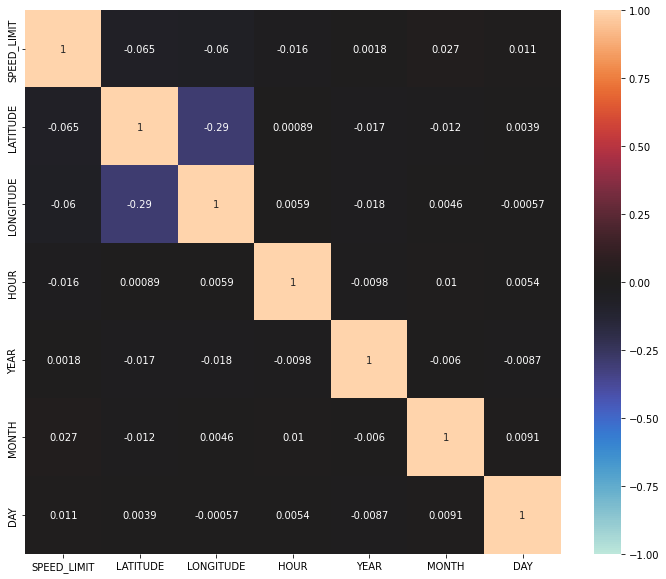

In [59]:
# creando matriz de correlacion con variables numericas
import seaborn as sns
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(numericas.corr(method = 'pearson'), annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

Análisis:

Se puede ver como las variables de tipo numéricas no tienen correlación, por ende se pueden utilizar dentro del modelo. 

In [60]:
# Influencia de las condiciones de luz
x = data["LIGHT_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de las condiciones de luz")
print(Results)

Influencia de las condiciones de luz
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.0458  0.001  0.0362  0.0555   True
   0.0    3.0   0.0499  0.001    0.04  0.0597   True
   0.0    4.0   0.0675  0.001  0.0567  0.0782   True
   0.0    5.0   0.0482  0.001  0.0357  0.0607   True
   0.0    6.0   0.0487  0.001  0.0366  0.0608   True
   0.0    7.0   0.0148 0.0333  0.0006   0.029   True
   0.0   88.0   0.0134 0.7104 -0.0109  0.0377  False
   0.0   99.0  -0.1287  0.001 -0.1452 -0.1121   True
   1.0    3.0    0.004  0.001  0.0011   0.007   True
   1.0    4.0   0.0217  0.001  0.0165  0.0268   True
   1.0    5.0   0.0023    0.9 -0.0058  0.0105  False
   1.0    6.0   0.0029    0.9 -0.0047  0.0105  False
   1.0    7.0   -0.031  0.001 -0.0417 -0.0204   True
   1.0   88.0  -0.0324  0.001 -0.0548 -0.0101   True
   1.0   99.0  -0.1745  0.001 -0.1881 -0.1609   True
   3.0   

In [61]:
# Influencia del tipo de interseccion
x = data["JUNCTION_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tipo de interseccion")
print(Results)

Influencia del tipo de interseccion
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0051  0.001 -0.0088 -0.0014   True
   0.0    2.0   0.0609  0.001   0.057  0.0648   True
   0.0    3.0   0.0239  0.001  0.0189  0.0289   True
   0.0    5.0   0.0003    0.9 -0.0105  0.0111  False
   0.0    6.0   0.0759  0.001  0.0576  0.0943   True
   0.0    7.0    0.034    0.9 -0.0402  0.1082  False
   0.0    8.0   0.0397  0.001  0.0191  0.0602   True
   0.0    9.0   0.0442  0.001  0.0317  0.0566   True
   0.0   10.0  -0.0422  0.104 -0.0878  0.0034  False
   0.0   11.0  -0.0219 0.2015 -0.0477   0.004  False
   0.0   88.0  -0.0182  0.001  -0.031 -0.0054   True
   0.0   99.0   -0.056  0.001 -0.0955 -0.0165   True
   1.0    2.0   0.0659  0.001  0.0629   0.069   True
   1.0    3.0    0.029  0.001  0.0246  0.0334   True
   1.0    5.0   0.0054    0.9 -0.0052  0.0159  False
   1.0    

In [62]:
# Influencia del tipo de colision
x = data["COLLISION_TYPE_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tipo de colision")
print(Results)

Influencia del tipo de colision
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.1426  0.001  0.1251  0.1601   True
   0.0    2.0   0.1003  0.001   0.084  0.1166   True
   0.0    3.0  -0.0203  0.001 -0.0358 -0.0048   True
   0.0    4.0  -0.0298 0.0031 -0.0544 -0.0052   True
   0.0    5.0   0.0066    0.9 -0.0154  0.0285  False
   0.0    6.0  -0.0528  0.001 -0.0718 -0.0339   True
   0.0    7.0  -0.0888  0.001 -0.1049 -0.0728   True
   0.0    8.0  -0.0622  0.001 -0.0796 -0.0448   True
   0.0    9.0  -0.0447  0.001 -0.0621 -0.0273   True
   0.0   10.0  -0.1094  0.001 -0.1343 -0.0846   True
   0.0   11.0   0.0747  0.001   0.059  0.0904   True
   0.0   12.0  -0.0047    0.9 -0.0297  0.0204  False
   0.0   13.0   0.0392  0.001  0.0165  0.0619   True
   0.0   14.0   0.0275 0.0464  0.0002  0.0549   True
   0.0   15.0  -0.0321 0.0511 -0.0643  0.0001  False
   0.0   17.0 

In [63]:
# Influencia del estado de la carretera
x = data["SURF_COND_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del estado de la carretera")
print(Results)

Influencia del estado de la carretera
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.0249  0.001  0.0176  0.0321   True
   0.0    2.0   0.0219  0.001  0.0152  0.0286   True
   0.0    3.0  -0.0008    0.9 -0.0158  0.0142  False
   0.0    4.0   0.0273  0.001  0.0114  0.0433   True
   0.0    5.0   0.0709 0.0043  0.0124  0.1295   True
   0.0    6.0   0.0229 0.4722 -0.0095  0.0554  False
   0.0    7.0  -0.0265    0.9 -0.0961  0.0432  False
   0.0    8.0   0.2546  0.001  0.0639  0.4452   True
   0.0    9.0   0.0509 0.8206 -0.0438  0.1456  False
   0.0   88.0   0.0625  0.001  0.0202  0.1049   True
   0.0   99.0  -0.1114  0.001 -0.1324 -0.0904   True
   1.0    2.0   -0.003 0.1293 -0.0063  0.0003  False
   1.0    3.0  -0.0256  0.001 -0.0395 -0.0118   True
   1.0    4.0   0.0024    0.9 -0.0124  0.0173  False
   1.0    5.0   0.0461 0.2896 -0.0122  0.1044  False
   1.0  

In [64]:
# Influencia de la condicion de la carretera
x = data["RD_COND_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la condicion de la carretera")
print(Results)

Influencia de la condicion de la carretera
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.0102  0.001  0.0041  0.0163   True
   0.0    2.0   0.0435 0.0157  0.0043  0.0827   True
   0.0    3.0    0.024 0.0049  0.0041  0.0438   True
   0.0    4.0  -0.0137    0.9 -0.0447  0.0173  False
   0.0    5.0   0.0668  0.001  0.0384  0.0952   True
   0.0    6.0   -0.072 0.5644 -0.1821  0.0382  False
   0.0    7.0  -0.1431 0.0331 -0.2806 -0.0056   True
   0.0    8.0   0.0548 0.0032  0.0106   0.099   True
   0.0   88.0   0.0092    0.9  -0.012  0.0304  False
   0.0   99.0  -0.0449  0.001  -0.069 -0.0207   True
   1.0    2.0   0.0333  0.172 -0.0055   0.072  False
   1.0    3.0   0.0138 0.4134 -0.0052  0.0327  False
   1.0    4.0  -0.0239 0.2869 -0.0544  0.0065  False
   1.0    5.0   0.0566  0.001  0.0288  0.0844   True
   1.0    6.0  -0.0822 0.3654 -0.1922  0.0278  False
   

In [65]:
# Influencia del clima
x = data["WEATHER_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del clima")
print(Results)

Influencia del clima
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    2.0   0.0329  0.001  0.0144  0.0514   True
   0.0    3.0   0.0069 0.0019  0.0014  0.0123   True
   0.0    5.0   0.0094    0.9 -0.0228  0.0415  False
   0.0    6.0   0.0126  0.001  0.0082   0.017   True
   0.0    7.0    0.019  0.001  0.0131  0.0249   True
   0.0    8.0  -0.0193  0.001  -0.032 -0.0067   True
   0.0    9.0    0.012    0.9 -0.0175  0.0416  False
   0.0   10.0   0.0175    0.9  -0.027   0.062  False
   0.0   11.0  -0.0354    0.9 -0.2205  0.1497  False
   0.0   12.0   0.0258  0.005  0.0042  0.0473   True
   0.0   88.0  -0.0006    0.9 -0.0256  0.0244  False
   0.0   99.0  -0.1409  0.001 -0.1602 -0.1216   True
   2.0    3.0   -0.026  0.001 -0.0444 -0.0076   True
   2.0    5.0  -0.0235 0.6245 -0.0601  0.0131  False
   2.0    6.0  -0.0203 0.0132 -0.0383 -0.0022   True
   2.0    7.0  -0.0139  0

In [66]:
# Influencia de la senal del control de trafico
x = data["SIGNAL_FLAG"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la senal del control de trafico")
print(Results)

Influencia de la senal del control de trafico
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0509  0.001   0.049 0.0528   True
     0      2   0.0233    0.9 -0.1196 0.1663  False
     1      2  -0.0276 0.8846 -0.1705 0.1153  False
---------------------------------------------------


In [67]:
# Influencia del genero
x = data["SEX_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del genero")
print(Results)

Influencia del genero
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.0649 0.001  -0.067 -0.0629   True
     0      2  -0.1255 0.001 -0.1355 -0.1155   True
     0      3  -0.2255 0.001 -0.2293 -0.2216   True
     1      2  -0.0606 0.001 -0.0705 -0.0506   True
     1      3  -0.1605 0.001 -0.1643 -0.1568   True
     2      3     -0.1 0.001 -0.1105 -0.0895   True
---------------------------------------------------


In [68]:
# Influencia del equipamiento
x = data["EQUIP_PROB_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del equipamiento")
print(Results)

Influencia del equipamiento
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.0383  0.001  0.0352  0.0415   True
   0.0   11.0   0.1007 0.4586 -0.0392  0.2406  False
   0.0   13.0   0.2459  0.001    0.19  0.3017   True
   0.0   31.0   0.1298  0.001  0.0907   0.169   True
   0.0   42.0    0.149 0.0755 -0.0063  0.3042  False
   0.0   43.0   0.4016  0.001  0.2663  0.5368   True
   0.0   44.0   0.3756  0.001  0.1811    0.57   True
   0.0   45.0   0.3591  0.001  0.2493  0.4689   True
   0.0   46.0   0.3219  0.001  0.1568  0.4871   True
   0.0   47.0   0.3301  0.001  0.2281  0.4321   True
   0.0   88.0   0.0368 0.3577 -0.0114  0.0851  False
   0.0   99.0  -0.0893  0.001 -0.0942 -0.0843   True
   1.0   11.0   0.0624    0.9 -0.0775  0.2023  False
   1.0   13.0   0.2075  0.001  0.1517  0.2633   True
   1.0   31.0   0.0915  0.001  0.0524  0.1306   True
   1.0   42.0   0.

In [69]:
# Influencia del equipamiento propio del vehiculo
x = data["SAF_EQUIP_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del equipamiento propio del vehiculo")
print(Results)

Influencia del equipamiento propio del vehiculo
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.1958  0.001  0.1883  0.2033   True
   0.0   11.0   -0.018  0.046  -0.036 -0.0001   True
   0.0   12.0   0.0112 0.6833 -0.0062  0.0287  False
   0.0   13.0   0.0163  0.001  0.0112  0.0213   True
   0.0   15.0   0.0232  0.001  0.0111  0.0353   True
   0.0   16.0    0.051  0.001  0.0324  0.0696   True
   0.0   17.0   0.0562  0.001  0.0322  0.0802   True
   0.0   18.0   0.0397  0.001  0.0102  0.0692   True
   0.0   21.0   0.6353  0.001  0.6132  0.6575   True
   0.0   22.0   0.4888  0.001  0.3108  0.6668   True
   0.0   23.0   0.6399  0.001  0.6086  0.6712   True
   0.0   24.0  -0.0972  0.001  -0.147 -0.0474   True
   0.0   25.0    0.574  0.001  0.5092  0.6388   True
   0.0   26.0   0.4484  0.001  0.2985  0.5983   True
   0.0   88.0  -0.0358 0.0038 -0.0655  -0.006   Tru

In [70]:
# Influencia del tipo de dano sobre el vehiculo
x = data["DAMAGE_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tipo de dano sobre el vehiculo")
print(Results)

Influencia del tipo de dano sobre el vehiculo
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -0.0201 0.0176 -0.0382  -0.002   True
   0.0    2.0   -0.008 0.8383 -0.0252  0.0092  False
   0.0    3.0   0.0359  0.001  0.0187  0.0531   True
   0.0    4.0   0.1923  0.001  0.1752  0.2095   True
   0.0    5.0   0.4145  0.001  0.3968  0.4322   True
   0.0   88.0   0.0068    0.9  -0.033  0.0466  False
   0.0   99.0  -0.0763  0.001 -0.0941 -0.0586   True
   1.0    2.0   0.0121  0.001  0.0056  0.0186   True
   1.0    3.0    0.056  0.001  0.0495  0.0625   True
   1.0    4.0   0.2124  0.001  0.2061  0.2188   True
   1.0    5.0   0.4346  0.001  0.4269  0.4423   True
   1.0   88.0   0.0269   0.33 -0.0096  0.0634  False
   1.0   99.0  -0.0562  0.001  -0.064 -0.0485   True
   2.0    3.0   0.0439  0.001  0.0407   0.047   True
   2.0    4.0   0.2003  0.001  0.1974  0.2032   True


In [71]:
# Influencia del tipo de movimiento del vehiculo
x = data["MOVEMENT_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tipo de movimiento del vehiculo")
print(Results)

Influencia del tipo de movimiento del vehiculo
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.1115  0.001  0.0946  0.1284   True
   0.0    2.0   0.0503  0.001  0.0327   0.068   True
   0.0    3.0   0.0218  0.001  0.0047  0.0389   True
   0.0    4.0   0.0417  0.001  0.0224   0.061   True
   0.0    5.0   -0.048  0.001 -0.0695 -0.0265   True
   0.0    6.0   0.0663  0.001   0.049  0.0837   True
   0.0    7.0  -0.0111 0.8967 -0.0302   0.008  False
   0.0    8.0  -0.0343  0.001 -0.0595 -0.0092   True
   0.0    9.0  -0.0936  0.001 -0.1166 -0.0705   True
   0.0   10.0  -0.0474  0.001 -0.0666 -0.0282   True
   0.0   11.0  -0.1082  0.001  -0.127 -0.0894   True
   0.0   12.0   0.0676  0.001    0.05  0.0852   True
   0.0   13.0  -0.0264  0.001 -0.0455 -0.0073   True
   0.0   14.0  -0.0335 0.7756 -0.0866  0.0196  False
   0.0   15.0   0.0308 0.0015   0.006  0.0555   True

In [72]:
# Influencia de tener presencia de comercios
x = data["COMMERCIAL_FLAG"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tener presencia de comercios")
print(Results)

Influencia de tener presencia de comercios
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.0999 0.001 -0.1032 -0.0965   True
     0      2     0.65 0.001  0.6435  0.6566   True
     1      2   0.7499 0.001  0.7427  0.7571   True
---------------------------------------------------


In [73]:
# Influencia del tipo de vehiculo
x = data["BODY_TYPE_CODE"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tipo de vehiculo")
print(Results)

Influencia del tipo de vehiculo
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.5479  0.001  0.5077  0.5881   True
   0.0    2.0  -0.0236  0.741 -0.0589  0.0117  False
   0.0    3.0  -0.0343 0.3042 -0.0755  0.0069  False
   0.0    4.0  -0.0884  0.553 -0.2075  0.0306  False
   0.0    5.0  -0.1377  0.001  -0.176 -0.0994   True
   0.0    6.0  -0.1553  0.001 -0.1947  -0.116   True
   0.0    7.0   -0.174  0.001 -0.2127 -0.1353   True
   0.0    8.0  -0.0518 0.0021 -0.0945  -0.009   True
   0.0    9.0  -0.1217 0.0077 -0.2293 -0.0141   True
   0.0   10.0   0.0439  0.004  0.0064  0.0814   True
   0.0   11.0  -0.1795  0.001 -0.2546 -0.1045   True
   0.0   12.0  -0.2085  0.001 -0.2445 -0.1724   True
   0.0   13.0  -0.1328  0.001 -0.1774 -0.0883   True
   0.0   14.0  -0.1848  0.001 -0.2401 -0.1296   True
   0.0   15.0  -0.1968  0.001  -0.243 -0.1505   True
   0.0   16.0 

In [74]:
# Influencia de si el vehiculo era conducido
x = data["DRIVERLESS_FLAG"]
y = data["INJ_SEVER_CODE"]

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de si el vehiculo era conducido")
print(Results)

Influencia de si el vehiculo era conducido
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1037  0.001 -0.1121 -0.0953   True
     0      2  -0.0242 0.0434 -0.0478 -0.0005   True
     0      3   0.6561  0.001  0.6489  0.6633   True
     1      2   0.0796  0.001  0.0545  0.1046   True
     1      3   0.7598  0.001  0.7488  0.7708   True
     2      3   0.6803  0.001  0.6556   0.705   True
----------------------------------------------------


In [75]:
categoricas.columns

Index(['LIGHT_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE', 'SURF_COND_CODE',
       'RD_COND_CODE', 'WEATHER_CODE', 'SIGNAL_FLAG', 'SEX_CODE',
       'INJ_SEVER_CODE', 'EQUIP_PROB_CODE', 'SAF_EQUIP_CODE', 'DAMAGE_CODE',
       'MOVEMENT_CODE', 'COMMERCIAL_FLAG', 'BODY_TYPE_CODE',
       'DRIVERLESS_FLAG'],
      dtype='object')

### Analisis: 

Con todas las variables categoricas analizadas se puede ver como la hipotesis nula se puede rechazar, por lo que con estas variables, es necesario trabajar:

* LIGHT_CODE
* JUNCTION_CODE
* COLLISION_TYPE_CODE
* SURF_COND_CODE
* RD_COND_CODE
* WEATHER_CODE
* SIGNAL_FLAG
* SEX_CODE
* EQUIP_PROB_CODE
* SAF_EQUIP_CODE
* DAMAGE_CODE
* MOVEMENT_CODE
* COMMERCIAL_FLAG
* BODY_TYPE_CODE
* DRIVERLESS_FLAG

### Seleccion de variables:

Habiendo hecho los analisis anteriores, se identificaron que todas las variables que se identificaron es necesario utilizarlas para el modelo, quedando asi: 


* LIGHT_CODE
* JUNCTION_CODE
* COLLISION_TYPE_CODE
* SURF_COND_CODE
* RD_COND_CODE
* WEATHER_CODE
* SIGNAL_FLAG
* SEX_CODE
* EQUIP_PROB_CODE
* SAF_EQUIP_CODE
* DAMAGE_CODE
* MOVEMENT_CODE
* COMMERCIAL_FLAG
* BODY_TYPE_CODE
* DRIVERLESS_FLAG
* SPEED_LIMIT
* LATITUDE
* LONGITUDE
* HOUR
* YEAR
* MONTH
* DAY

### Seleccion del modelo

Ahora se va a proceder a utilizar varios modelos para ver que tan bien se pueden crear predicciones, por ello se van a crear 3 modelos:


1. Gradient Boosting
2. Maquinas de Soporte Vectorial
3. Arboles de decision

In [76]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.model_selection import cross_val_score #validación cruzada score 
from sklearn.model_selection import StratifiedKFold #validacion cruzada 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #matriz de confusión
from sklearn.metrics import accuracy_score #score de validación cruzada 

# Modelos de ML con que se va a trabajar
from sklearn.linear_model import LogisticRegression #regresion logística
from sklearn.tree import DecisionTreeClassifier #arboles de decision
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Análisis discriminante lineal 
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

### Escalado de datos numericos

In [77]:
# Comprobando tamano del dataset
data.shape

(1054896, 23)

Dataset cumple con tener más de un millón de filas para el modelo.

In [78]:
# Comprobando si hay nulos
np.sum(data.isnull())

LIGHT_CODE             0
JUNCTION_CODE          0
COLLISION_TYPE_CODE    0
SURF_COND_CODE         0
RD_COND_CODE           0
WEATHER_CODE           0
SIGNAL_FLAG            0
SEX_CODE               0
EQUIP_PROB_CODE        0
SAF_EQUIP_CODE         0
DAMAGE_CODE            0
MOVEMENT_CODE          0
COMMERCIAL_FLAG        0
BODY_TYPE_CODE         0
DRIVERLESS_FLAG        0
SPEED_LIMIT            0
LATITUDE               0
LONGITUDE              0
HOUR                   0
YEAR                   0
MONTH                  0
DAY                    0
INJ_SEVER_CODE         0
dtype: int64

In [79]:
data.head()

,LIGHT_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,RD_COND_CODE,WEATHER_CODE,SIGNAL_FLAG,SEX_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,DAMAGE_CODE,MOVEMENT_CODE,COMMERCIAL_FLAG,BODY_TYPE_CODE,DRIVERLESS_FLAG,SPEED_LIMIT,LATITUDE,LONGITUDE,HOUR,YEAR,MONTH,DAY,INJ_SEVER_CODE
0,1.0,2.0,88.0,2.0,1.0,6.0,0,0,0.0,0.0,2.0,10.0,0,21.0,0,0.0,39.316645,-76.728809,9,2017,6,20,0
1,1.0,2.0,11.0,2.0,1.0,6.0,1,1,0.0,13.0,4.0,12.0,0,2.0,0,35.0,38.848088,-76.878811,13,2017,4,2,1
2,3.0,1.0,17.0,1.0,1.0,6.0,0,0,1.0,13.0,4.0,2.0,0,23.0,0,35.0,39.619699,-77.769977,1,2016,6,3,1
3,1.0,3.0,8.0,2.0,1.0,6.0,1,1,1.0,13.0,4.0,7.0,0,2.0,0,40.0,38.387455,-75.065723,6,2018,9,3,0
5,1.0,2.0,11.0,1.0,1.0,3.0,1,0,1.0,13.0,4.0,2.0,0,23.0,0,25.0,39.371149,-76.792838,9,2017,5,22,0


In [80]:
# Conjunto de datos de validación dividida
# Con el 80% se crea el modelo y con el 20% se entrena

array = data.values #los datos ahora se transforman en un arreglo

X = array[:,0:22]  
y = array[:,22]
print(X.shape)
print(y.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

(1054896, 22)
(1054896,)


In [81]:
# Se dividen los datos en conjunto de entrenamiento y prueba, se utiliza random_state = 0 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### Hipertuneo de Criterios

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [83]:
# Creando el modelo de Regresion logistica para utilizar con GridSearch
logic = LogisticRegression(random_state=0)

In [84]:
# Creando estimador de parametros
param_grid = { 
    'penalty':['none', 'l2'],
    'fit_intercept':[True, False]
}

In [85]:
# Realizando Cross Validation con 3 y probando parametros
CV_1 = GridSearchCV(estimator = logic, param_grid=param_grid, cv= 3)
CV_1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['none', 'l2']})

In [86]:
# Comprobando cuales son los mejores parametros a utilizar
CV_1.best_params_

{'fit_intercept': True, 'penalty': 'none'}

In [87]:
# Creando el modelo de Analisis de Discriminante lineal para utilizar con GridSearch
discriminante = LinearDiscriminantAnalysis()

In [88]:
# Creando estimador de parametros
param_grid = { 
    'solver': ['svd', 'lsqr', 'eigen']
}

In [89]:
# Realizando Cross Validation con 3 y probando parametros
CV_2 = GridSearchCV(estimator = discriminante, param_grid=param_grid, cv= 3)
CV_2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']})

In [90]:
# Comprobando cuales son los mejores parametros a utilizar
CV_2.best_params_

{'solver': 'svd'}

In [91]:
# Creando el modelo de Decision Tree para utilizar con GridSearch
tree = DecisionTreeClassifier(random_state=0)

In [92]:
# Creando estimador de parametros
param_grid = { 
    'splitter':['best','random'],
    'max_depth' : [3,5,7],
    'criterion' :['gini', 'entropy']
}

In [93]:
# Realizando Cross Validation con 3 y probando parametros
CV_3 = GridSearchCV(estimator = tree, param_grid=param_grid, cv= 3)
CV_3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'splitter': ['best', 'random']})

In [94]:
# Comprobando cuales son los mejores parametros a utilizar
CV_3.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}

In [95]:
# Creando el modelo de Random Forest para utilizar con GridSearch
random = RandomForestClassifier(random_state=0)

In [96]:
# Creando estimador de parametros
param_grid = { 
    'max_depth' : [3,5,7],
    'criterion' :['gini', 'entropy']
}

In [97]:
# Realizando Cross Validation con 3 y probando parametros
CV_4 = GridSearchCV(estimator = random, param_grid=param_grid, cv= 3)
CV_4.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7]})

In [98]:
# Comprobando cuales son los mejores parametros a utilizar
CV_4.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [99]:
gauss = GaussianNB()

In [100]:
# Creando estimador de parametros
param_grid = { 
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5]
}

In [101]:
# Realizando Cross Validation con 3 y probando parametros
CV_5 = GridSearchCV(estimator = gauss, param_grid=param_grid, cv= 3)
CV_5.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05]})

In [102]:
# Comprobando cuales son los mejores parametros a utilizar
CV_5.best_params_

{'var_smoothing': 0.01}

In [103]:
# Algoritmos de Comprobación, se guardan en una lista
models = []
models.append(('LR', LogisticRegression(penalty = 'none', fit_intercept = True)))
models.append(('LDA', LinearDiscriminantAnalysis(solver = 'svd')))
models.append(('CART', DecisionTreeClassifier(criterion = 'gini', max_depth = 7, splitter = 'best')))
models.append(('RF', RandomForestClassifier(max_depth = 7, criterion = 'gini')))
models.append(('GB', GradientBoostingClassifier(max_depth = 5)))
models.append(('NB', GaussianNB(var_smoothing = 0.01)))

In [104]:
resultados = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True) # Declaracion de la validación cruzada
    cv_resultados = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') # genera la precisión de la validación cruzada
    resultados.append(cv_resultados)  # genera la precisión de la validación cruzada
    names.append(name)
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))

LR: 0.821519 (0.000096)
LDA: 0.820660 (0.000074)
CART: 0.829161 (0.000106)
RF: 0.826015 (0.000109)
GB: 0.834805 (0.000120)
NB: 0.378038 (0.001795)


#### Comparación de los Algoritmos

Se puede observar que el algoritmo que da los mejores resultados corresponde al Gradient Boosting, seguido del Árbol de Decisión, por ello se van a comparar ambos para ver que podemos ver con la matriz de confusión. 


In [105]:
# Haciendo predicciones y evaluación del dataset con Gradient Boosting
model = GradientBoostingClassifier(max_depth = 5)
model.fit(X_train, y_train)
prediccion = model.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediccion)

array([[168163,   3169],
       [ 31525,   8123]])

In [107]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, prediccion)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91    171332
         1.0       0.72      0.20      0.32     39648

    accuracy                           0.84    210980
   macro avg       0.78      0.59      0.61    210980
weighted avg       0.82      0.84      0.80    210980



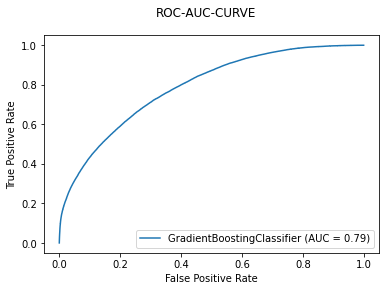

In [108]:
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
plot_roc_curve(model, X_test, y_test)
plt.suptitle("ROC‑AUC‑CURVE")
plt.show()

In [109]:
# Haciendo predicciones y evaluación del dataset con Decision Tree
model_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, splitter = 'best')
model_2.fit(X_train, y_train)
prediccion = model_2.predict(X_test)

In [110]:
confusion_matrix(y_test, prediccion)

array([[168531,   2801],
       [ 33191,   6457]])

In [111]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, prediccion)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90    171332
         1.0       0.70      0.16      0.26     39648

    accuracy                           0.83    210980
   macro avg       0.77      0.57      0.58    210980
weighted avg       0.81      0.83      0.78    210980



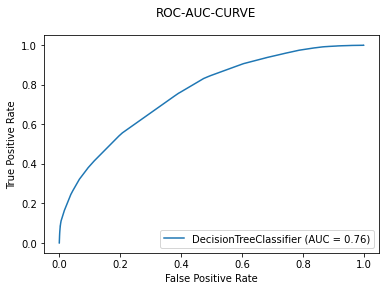

In [112]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_2, X_test, y_test)
plt.suptitle("ROC‑AUC‑CURVE")
plt.show()

Vamos a evaluar lo mismo pero utilizando una máquina de soporte vectorial con soporte para clases desbalanceadas para ver como se comporta con este algoritmo tan potente. 

In [113]:
# Haciendo predicciones y evaluación del dataset con Maquinas de Soporte vectorial
model_3 = SVC(kernel='sigmoid', gamma = 'scale', class_weight = 'balanced', max_iter = 500)
model_3.fit(X_train, y_train)
prediccion = model_3.predict(X_test)

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [114]:
confusion_matrix(y_test, prediccion)

array([[ 46873, 124459],
       [  6407,  33241]])

In [115]:
from sklearn.metrics import classification_report
print(f"Informe de Clasificación:\n"
      f"{classification_report(y_test, prediccion)}")

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.88      0.27      0.42    171332
         1.0       0.21      0.84      0.34     39648

    accuracy                           0.38    210980
   macro avg       0.55      0.56      0.38    210980
weighted avg       0.75      0.38      0.40    210980



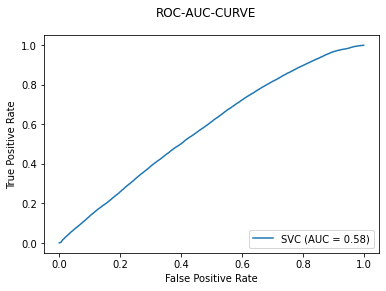

In [116]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_3, X_test, y_test)
plt.suptitle("ROC‑AUC‑CURVE")
plt.show()

Se puede observar que aunque el modelo no es bueno, con la Máquina de Soporte Vectorial se le trata de dar importancia a la clase minoritaria y ahora el F1 del "No" es 42% y el "Si" es de un 34%. Asimismo el recall del "No" es de un 27% y el del "Si" un 84%.

### SMOTE

Ahora que hemos probado con varios algoritmos y no han funcionado ya que las clases estan bastante desbalanceadas vamos a proceder a utilizar una técnica SMOTE (Synthetic Minority Over-sampling Technique) con la que vamos a crear observaciones artificiales en la clase minoritaria para con ello tratar de aumentar la predicción que se obtiene al nivel del "si", es decir, de aquellas personas que han sufrido lesiones en los accidentes de tránsito.

In [117]:
print("Antes del OverSampling, conteo de la etiqueta '1': {}".format(sum(y_train == 1)))
print("Antes del OverSampling, conteo de la etiqueta '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('Después del OverSampling, el tamaño del train_X: {}'.format(X_train_res.shape))
print('Después del OverSampling, el tamaño del train_y: {} \n'.format(y_train_res.shape))

print("Después del OverSampling, conteo de la etiqueta '1': {}".format(sum(y_train_res == 1)))
print("Después del OverSampling, conteo de la etiqueta '0': {}".format(sum(y_train_res == 0)))

Antes del OverSampling, conteo de la etiqueta '1': 159336
Antes del OverSampling, conteo de la etiqueta '0': 684580 

Después del OverSampling, el tamaño del train_X: (1369160, 22)
Después del OverSampling, el tamaño del train_y: (1369160,) 

Después del OverSampling, conteo de la etiqueta '1': 684580
Después del OverSampling, conteo de la etiqueta '0': 684580


In [118]:
# Entrenando el modelo con el nuevo oversampling creado y con Gradient Boosting
modelo_oversampling = GradientBoostingClassifier(max_depth = 5)
modelo_oversampling.fit(X_train_res, y_train_res.ravel())
prediccion = modelo_oversampling.predict(X_test)

# print classification report
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90    171332
         1.0       0.59      0.29      0.39     39648

    accuracy                           0.83    210980
   macro avg       0.72      0.62      0.65    210980
weighted avg       0.80      0.83      0.80    210980



In [119]:
confusion_matrix(y_test, prediccion)

array([[163092,   8240],
       [ 27959,  11689]])

In [120]:
# Entrenando el modelo con el nuevo oversampling creado y con Arbol de Decision
modelo_oversampling_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, splitter = 'best')
modelo_oversampling_2.fit(X_train_res, y_train_res.ravel())
prediccion = modelo_oversampling_2.predict(X_test)

# print classification report
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90    171332
         1.0       0.57      0.25      0.35     39648

    accuracy                           0.82    210980
   macro avg       0.71      0.60      0.62    210980
weighted avg       0.79      0.82      0.79    210980



In [121]:
confusion_matrix(y_test, prediccion)

array([[163735,   7597],
       [ 29755,   9893]])

In [122]:
# Entrenando el modelo con el nuevo oversampling creado y con la maquina de soporte vectorial
modelo_oversampling_3 = SVC(kernel='sigmoid', gamma = 'scale', class_weight = 'balanced', max_iter = 500)
modelo_oversampling_3.fit(X_train_res, y_train_res.ravel())
prediccion = modelo_oversampling_3.predict(X_test)

# print classification report
print(classification_report(y_test, prediccion))

/Users/heinerleivagmail.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

         0.0       0.86      0.35      0.50    171332
         1.0       0.21      0.75      0.33     39648

    accuracy                           0.43    210980
   macro avg       0.54      0.55      0.42    210980
weighted avg       0.74      0.43      0.47    210980



In [123]:
print("Antes del Undersampling, conteo de la etiqueta '1': {}".format(sum(y_train == 1)))
print("Antes del Undersampling, conteo de la etiqueta '0': {} \n".format(sum(y_train == 0)))

from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('Después del Undersampling, el tamaño del train_X: {}'.format(X_train_miss.shape))
print('Después del Undersampling, el tamaño del train_y: {} \n'.format(y_train_miss.shape))

print("Después del Undersampling, conteo de la etiqueta '1': {}".format(sum(y_train_miss == 1)))
print("Después del Undersampling, conteo de la etiqueta '0': {}".format(sum(y_train_miss == 0)))

Antes del Undersampling, conteo de la etiqueta '1': 159336
Antes del Undersampling, conteo de la etiqueta '0': 684580 

Después del Undersampling, el tamaño del train_X: (318672, 22)
Después del Undersampling, el tamaño del train_y: (318672,) 

Después del Undersampling, conteo de la etiqueta '1': 159336
Después del Undersampling, conteo de la etiqueta '0': 159336


In [124]:
# train the model on train set
modelo_subsampling = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, 
                                            splitter = 'best', min_samples_split = 2, max_features = 8, class_weight = 'balanced')
modelo_subsampling.fit(X_train_miss, y_train_miss.ravel())
prediccion = modelo_subsampling.predict(X_test)
  
# print classification report
print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

         0.0       0.83      0.45      0.59    171332
         1.0       0.20      0.60      0.30     39648

    accuracy                           0.48    210980
   macro avg       0.52      0.53      0.45    210980
weighted avg       0.71      0.48      0.53    210980



Con los modelos creados no se han obtenido buenos resultados, por ende vamos a tratar de crear una red neuronal para ver cómo se comportan. 

In [125]:
# Importando las bibliotecas para la red neuronal
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [126]:
# Función para calcular los índices de calidad de la predicción
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria}

In [127]:
# Creando copia
d = data.copy()

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [129]:
# Elimina la variable catégorica, deja las variables predictoras en X
X = d.iloc[:,0:22] 
X.head()

,LIGHT_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,RD_COND_CODE,WEATHER_CODE,SIGNAL_FLAG,SEX_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,DAMAGE_CODE,MOVEMENT_CODE,COMMERCIAL_FLAG,BODY_TYPE_CODE,DRIVERLESS_FLAG,SPEED_LIMIT,LATITUDE,LONGITUDE,HOUR,YEAR,MONTH,DAY
0,1.0,2.0,88.0,2.0,1.0,6.0,0,0,0.0,0.0,2.0,10.0,0,21.0,0,0.0,39.316645,-76.728809,9,2017,6,20
1,1.0,2.0,11.0,2.0,1.0,6.0,1,1,0.0,13.0,4.0,12.0,0,2.0,0,35.0,38.848088,-76.878811,13,2017,4,2
2,3.0,1.0,17.0,1.0,1.0,6.0,0,0,1.0,13.0,4.0,2.0,0,23.0,0,35.0,39.619699,-77.769977,1,2016,6,3
3,1.0,3.0,8.0,2.0,1.0,6.0,1,1,1.0,13.0,4.0,7.0,0,2.0,0,40.0,38.387455,-75.065723,6,2018,9,3
5,1.0,2.0,11.0,1.0,1.0,3.0,1,0,1.0,13.0,4.0,2.0,0,23.0,0,25.0,39.371149,-76.792838,9,2017,5,22


In [130]:
# Cambiando valores
d['INJ_SEVER_CODE'].replace({0: "No", 1: "Si"}, inplace = True)

In [131]:
# Obteniendo variable y
y = d.iloc[:,22:23] 
y.head()

,INJ_SEVER_CODE
0,No
1,Si
2,Si
3,No
5,No


In [132]:
# Separando los datos
dummy_y = pd.get_dummies(y)
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_X  = pd.DataFrame(scaler.fit_transform(X), columns = list(X))
X_train, X_test, y_train, y_test = train_test_split(scaled_X, dummy_y, train_size = 0.7, random_state = 0)

In [133]:
# Corroborando que la variable a explicar haya sido convertida de forma correcta
dummy_y.head()

,INJ_SEVER_CODE_No,INJ_SEVER_CODE_Si
0,1,0
1,0,1
2,0,1
3,1,0
5,1,0


In [134]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [135]:
# Creando modelo con Keras
model = Sequential()
model.add(Dense(10, input_dim = 22, activation = 'relu'))  # primera capa oculta con 10 neuronas
model.add(Dense(5, activation = 'sigmoid'))  # segunda capa oculta con 5 neuronas
model.add(Dense(2, activation = 'softmax')) # Agregamos capa output con 2 neuronas

In [136]:
# Compilando modelo
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [137]:
# Resumen del modelo
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                230       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
# Ajustando modelo
model.fit(X_train, y_train, epochs = 120, batch_size = 20, verbose = 0)
# La predicción es una matriz con 3 columnas
y_pred = model.predict(X_test)
# Convertimos a columna
y_test_class = np.argmax(np.asanyarray(y_test), axis = 1)  # Convertimos a array
y_pred_class = np.argmax(y_pred, axis = 1)

In [139]:
# Predicciones del modelo
scores = model.evaluate(X_test, y_test)
MC = confusion_matrix(y_test_class, y_pred_class)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

316469/316469 [==============================] - 4s 12us/step

Matriz de Confusión:
[[250960   6087]
 [ 48385  11037]]

Precisión Global:
0.827875716104895

Error Global:
0.17212428389510503

Precisión por categoría:
        No        Si
0  0.97632  0.185739


In [143]:
# Creando segundo modelo con red neuronal y aumentando la cantidad de capas de procesamiento
# Creando modelo con Keras
model = Sequential()
model.add(Dense(30, input_dim = 22, activation = 'relu'))  # primera capa oculta con 30 neuronas
model.add(Dense(20, activation = 'sigmoid'))  # segunda capa oculta con 20 neuronas
model.add(Dense(10, activation = 'relu'))  # segunda capa oculta con 10 neuronas
model.add(Dense(2, activation = 'softmax')) # Agregamos capa output con 5 neuronas

In [144]:
# Compilando modelo
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [145]:
# Ajustando modelo
model.fit(X_train, y_train, epochs = 200, batch_size = 20, verbose = 0)
# La predicción es una matriz con 3 columnas
y_pred = model.predict(X_test)
# Convertimos a columna
y_test_class = np.argmax(np.asanyarray(y_test), axis = 1)  # Convertimos a array
y_pred_class = np.argmax(y_pred, axis = 1)

In [146]:
# Predicciones del modelo
scores = model.evaluate(X_test, y_test)
MC = confusion_matrix(y_test_class, y_pred_class)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

316469/316469 [==============================] - 3s 8us/step

Matriz de Confusión:
[[252316   4731]
 [ 47740  11682]]

Precisión Global:
0.8341986102904234

Error Global:
0.16580138970957659

Precisión por categoría:
         No        Si
0  0.981595  0.196594
